### Inspect filtering with ACAE  


In [1]:
import json
import seaborn as sn
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up font for export to make it illustrator friendly
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# import JSON file
with open('/home/aogorodnikov/aae_filter_classes/classes_rgb_corrected.json', 'r') as json_file:  
    data = json.load(json_file)

## Distributions  
Compare distributions of losses within classes

In [4]:
df = pd.DataFrame(data)
df['phenotype'] = df.image.str.split(pat='/', expand=True).iloc[:,4]

/home/aogorodnikov/anaconda3/envs/imgSudoku/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/aogorodnikov/anaconda3/envs/imgSudoku/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


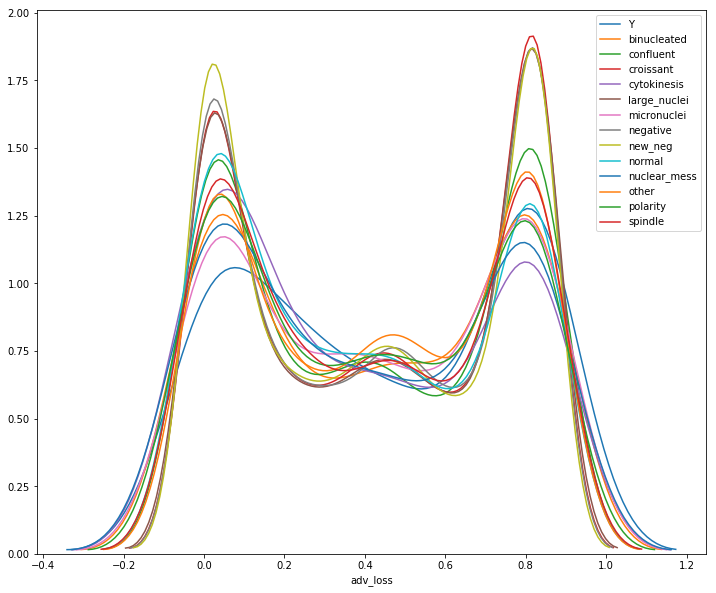

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(to_plot.adv_loss, hist=False, label=l)

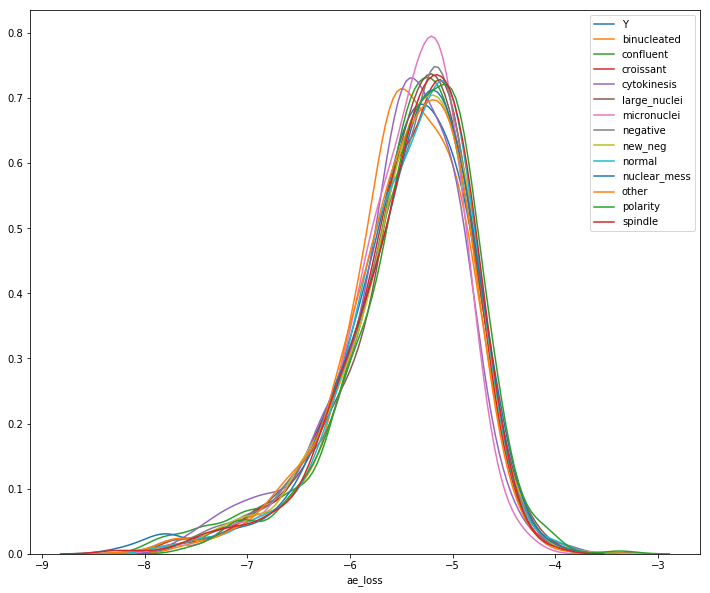

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(np.log(to_plot.ae_loss), hist=False, label=l)

In [16]:
to_plot = ['normal', "cytokinesis"]
df_sub = df[df.phenotype.isin(to_plot)]

In [17]:
df_sub.shape

(1396, 4)

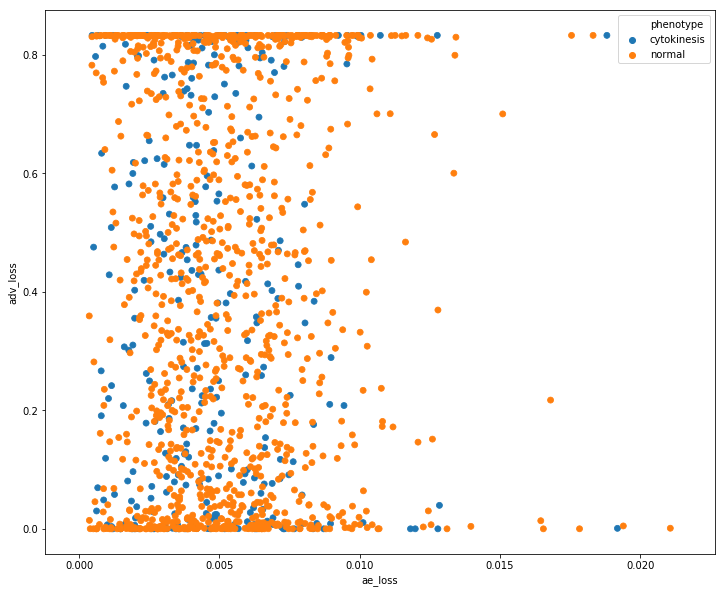

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))


ax = sn.scatterplot(df_sub.ae_loss, df_sub.adv_loss, hue=df_sub.phenotype, edgecolor=None)


In [24]:
pd.DataFrame(data['ae_loss']).describe()

,0
count,27973.000000
mean,0.003441
std,0.002767
min,0.000160
25%,0.001778
50%,0.002914
75%,0.004423
max,0.086788


In [25]:
pd.DataFrame(data['adv_loss']).describe()

,0
count,27973.000000
mean,0.674040
std,0.065056
min,0.350086
25%,0.630599
50%,0.676476
75%,0.720598
max,0.832555
